# Exploring the transformation functions used in the code

March 26, 2020

May 19, 2020 : Added linear+log transformation



In [4]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

import subprocess as sp
import sys
import os
import glob

from scipy import fftpack

In [9]:
pwd

'/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/repositories/lbann_cosmogan/0b_view_data'

In [5]:
%matplotlib widget

In [12]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/repositories/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

## Extract image data 

In [5]:
fname='raw_val.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape

(2456, 128, 128)

## Transformation functions

### Pixel intensity histogram

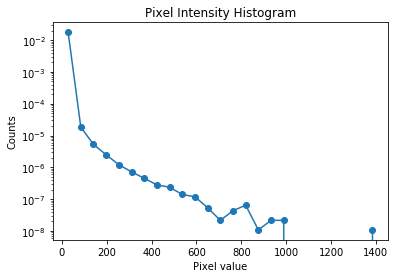

In [25]:
hist=f_pixel_intensity(samples[:100])

In [21]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4.) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s)

## Transform
plt.figure()
x=np.array([0,1,10,30,50,51,55,60,100,500,1000,5000,10000,15000],dtype=float)
arr=f_transform(x)
plt.plot(x,arr,linestyle='',marker='o')
plt.title('Transform')

## Inverse transform
x=arr
arr_inv=f_invtransform(arr)

plt.figure()
plt.plot(x,arr_inv,linestyle='',marker='o')
plt.title('Inv-transform')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Inv-transform')

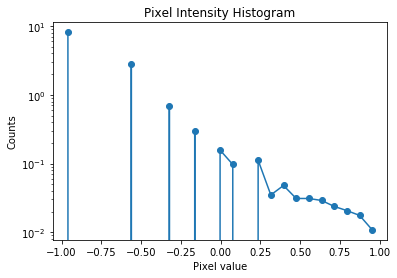

In [29]:
###pixel intensities after transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))

###pixel intensities after inverse transformation
arr1=f_transform(samples[:100])
hist=f_pixel_intensity(arr1))


nan

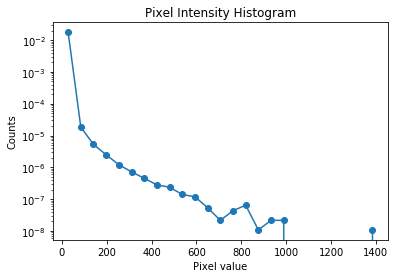

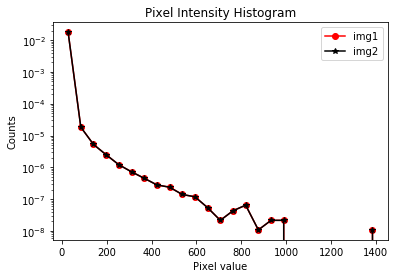

In [47]:
### Comparing array with f_invtransform(f_transform)
f_pixel_intensity(samples[:100])
arr=f_invtransform(f_transform(samples[:100]))
f_compare_pixel_intensity(samples[:100],arr)

## Spectrum

In [ ]:
arr=f_invtransform(f_transform(samples[:100]))
f_compare_spectrum(samples[:100],arr)

### New transformations

#### Log-linear transformations

In [23]:
def f_1(x):
    y=0.03*x-1.0
    return y

def f_2(x):
    a=0.5/(np.log(15000)-np.log(51))
    b=0.5-a*np.log(51)
#     print(a,b)
    y=a*np.log(x)+b
    return y


def f_3(x):
    a=(15e3-np.exp(0.5)*50)/(np.exp(0.5)-1)
    b=0.5-np.log(50+a)
#     print(a,b)
    y=np.log(x+a)+b
    return y


In [24]:
for x in [51,55,60,100,500,1000,5000,10000,15000]:
    print(x,f_2(x),f_3(x))
    
x=[51,55,60,100,500,1000,5000,10000,15000]
plt.figure()
plt.plot(x,f_2(x),marker='*',color='k',label='alog(x)+b')
plt.plot(x,f_3(x),marker='s',label='log(x+a)+b')

plt.legend()

51 0.5 0.5000433917857006
55 0.5066421375986419 0.5002169401024812
60 0.5142962267515128 0.5004338331521598
100 0.5592317857686026 0.5021672860947586
500 0.7008084587736643 0.5193385266884558
1000 0.7617822130069665 0.5403960709767652
5000 0.9033588860120283 0.6945745145401201
10000 0.9643326402453305 0.8589028049226037
15000 1.0 1.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Picking best one

In [26]:
x=np.linspace(0,50,num=500)
y=f_1(x)

# plt.figure()
# plt.plot(x,y,marker='o')

In [27]:
def f_transform_new(x):
    if x<=50:
        a=0.03; b=-1.0
        return a*x+b
    elif x>50: 
        a=0.5/np.log(300)
        b=0.5-a*np.log(50)
        return a*np.log(x)+b

def f_invtransform_new(y):
    if y<=0.5:
        a=0.03;b=-1.0
        return (y-b)/a
    elif y>0.5: 
        a=0.5/np.log(300)
        b=0.5-a*np.log(50)
        return np.exp((y-b)/a)


In [55]:
a1=np.load('/global/cfs/cdirs/m3363/vayyar/cosmogan_data/raw_data/peter_dataset/pre_norm_train.npy').astype('float')
a2=np.load('/global/cfs/cdirs/m3363/vayyar/cosmogan_data/raw_data/peter_dataset/old_pre_norm_train.npy')
print(a1.shape,a2.shape)

(197000, 1, 128, 128) (197000, 1, 128, 128)


In [56]:
print(type(a1),type(a2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
x_1=[0,1,10,30,50,51,55,60,100,500,1000,5000,10000,15000]
y_1=np.vectorize(f_transform_new)(x_1)
x_2=np.vectorize(f_invtransform_new)(y_1)
for x,y,x2 in zip(x_1,y_1,x_2): print(x,y,x2)
plt.figure()
plt.plot(x_1,y_1,linestyle='',marker='*')

0 -1.0 0.0
1 -0.97 1.0000000000000009
10 -0.7 10.000000000000002
30 -0.10000000000000009 29.999999999999996
50 0.5 50.0
51 0.5017359206267218 51.0
55 0.5083549977780377 55.000000000000064
60 0.5159825131484299 59.99999999999993
100 0.5607620630379777 99.99999999999996
500 0.7018472043091751 499.99999999999983
1000 0.7626092673471528 999.9999999999998
5000 0.9036944086183504 5000.000000000004
10000 0.9644564716563281 10000.00000000001
15000 1.0 15000.000000000004


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
### Vectorized transformation
x=np.ones(8)
print(x)

[1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
size=4
a1=np.ones(np.int(size**2/2))
x=np.vstack([a1,100*a1]).reshape(size,size)

In [69]:
def f_transform_new(x):
    if x<=50:
        a=0.03; b=-1.0
        return a*x+b
    elif x>50: 
        a=0.5/np.log(300)
        b=0.5-a*np.log(50)
        return a*np.log(x)+b

def f_invtransform_new(y):
    if y<=0.5:
        a=0.03;b=-1.0
        return (y-b)/a
    elif y>0.5: 
        a=0.5/np.log(300)
        b=0.5-a*np.log(50)
        return np.exp((y-b)/a)
    
    
x,np.vectorize(f_transform_new)(x)

(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]), array([[-1.  , -0.97],
        [-0.94, -0.91],
        [-0.88, -0.85],
        [-0.82, -0.79],
        [-0.76, -0.73]]))

In [79]:
greater_mask=x>50
lesser_mask=np.logical_not(greater_mask)
print(lesser)

x
x=x[lesser_mask]
a=0.03; b=-1.0
y=a*x+b
print(y)

# x=x[greater_mask]
# a=0.5/np.log(300)
# b=0.5-a*np.log(50)
# y=a*np.log(x)+b

[[ True  True  True  True]
 [ True  True  True  True]
 [False False False False]
 [False False False False]]
[-0.97 -0.97 -0.97 -0.97 -0.97 -0.97 -0.97 -0.97]


In [80]:
# x=np.arange(10).reshape(5,2)
# import tensorflow as tf
# import tensorflow.keras.backend as K
# value = 5
# wh = K.where(K.equal(x,value))

In [65]:
K.equal(x,value)

<tf.Tensor: id=5, shape=(5, 2), dtype=bool, numpy=
array([[False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False]])>

In [67]:
np.equal(x,5)

array([[False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False]])

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True]])